In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Egypt_Houses_Price.csv')

In [3]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [4]:
df.shape

(27361, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


**Drop null and duplicates**

In [6]:
df['Type'] = df['Type'].replace('Unknown', np.nan)
df['Furnished'] = df['Furnished'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)
df['Level'] = df['Level'].replace('Unknown', np.nan)
df['Compound'] = df['Compound'].replace('Unknown', np.nan)
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Payment_Option'] = df['Payment_Option'].replace('Unknown Payment', np.nan)
df['Delivery_Date'] = df['Delivery_Date'].replace('Unknown', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown', np.nan)
df['City'] = df['City'].replace('Unknown', np.nan)

In [7]:
df.isnull().sum()

Type                 36
Price                39
Bedrooms            239
Bathrooms           207
Area                507
Furnished          8528
Level             10439
Compound          11068
Payment_Option     3048
Delivery_Date     10108
Delivery_Term      4706
City                  0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

377

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(4528, 12)

**Fixing the Dtype for the columns**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528 entries, 4 to 18448
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            4528 non-null   object
 1   Price           4528 non-null   object
 2   Bedrooms        4528 non-null   object
 3   Bathrooms       4528 non-null   object
 4   Area            4528 non-null   object
 5   Furnished       4528 non-null   object
 6   Level           4528 non-null   object
 7   Compound        4528 non-null   object
 8   Payment_Option  4528 non-null   object
 9   Delivery_Date   4528 non-null   object
 10  Delivery_Term   4528 non-null   object
 11  City            4528 non-null   object
dtypes: object(12)
memory usage: 459.9+ KB


In [13]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

In [14]:
print(df['Type'].unique())
print(df['Level'].unique())

['Apartment' 'Penthouse' 'Duplex' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House']
['Ground' '1' '2' '3' '4' '9' 'Highest' '5' '8' '10' '10+' '7' '6']


In [15]:
df.loc[(df['Level']=='10+'),'Level'] = 11
df.loc[(df['Level']=='Highest'),'Level'] = 12
df.loc[(df['Level']=='Ground'),'Level'] = 0

In [16]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [17]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Apartment,5800000,2,3,160,No,0,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
1,Apartment,1844900,4,3,222,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
2,Apartment,309825,4,3,153,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
3,Apartment,2350000,3,3,178,No,2,La Mirada,Cash,Ready to move,Finished,New Cairo - El Tagamoa
4,Apartment,1050000,3,1,108,No,3,Maadi V,Cash or Installment,2023,Semi Finished,Zahraa Al Maadi


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            4528 non-null   object
 1   Price           4528 non-null   int64 
 2   Bedrooms        4528 non-null   int64 
 3   Bathrooms       4528 non-null   int64 
 4   Area            4528 non-null   int64 
 5   Furnished       4528 non-null   object
 6   Level           4528 non-null   object
 7   Compound        4528 non-null   object
 8   Payment_Option  4528 non-null   object
 9   Delivery_Date   4528 non-null   object
 10  Delivery_Term   4528 non-null   object
 11  City            4528 non-null   object
dtypes: int64(4), object(8)
memory usage: 424.6+ KB


In [19]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,4.528000e+03,4528.000000,4528.000000,4528.000000
mean,3.435122e+06,2.773189,2.345406,162.810292
std,3.721786e+06,0.858444,0.956277,86.802356
min,3.000000e+04,1.000000,1.000000,12.000000
25%,1.550000e+06,2.000000,2.000000,112.000000
50%,2.575500e+06,3.000000,2.000000,145.000000
75%,4.000000e+06,3.000000,3.000000,189.000000
max,6.500000e+07,9.000000,10.000000,950.000000


**visualization**

<Axes: xlabel='Price', ylabel='City'>

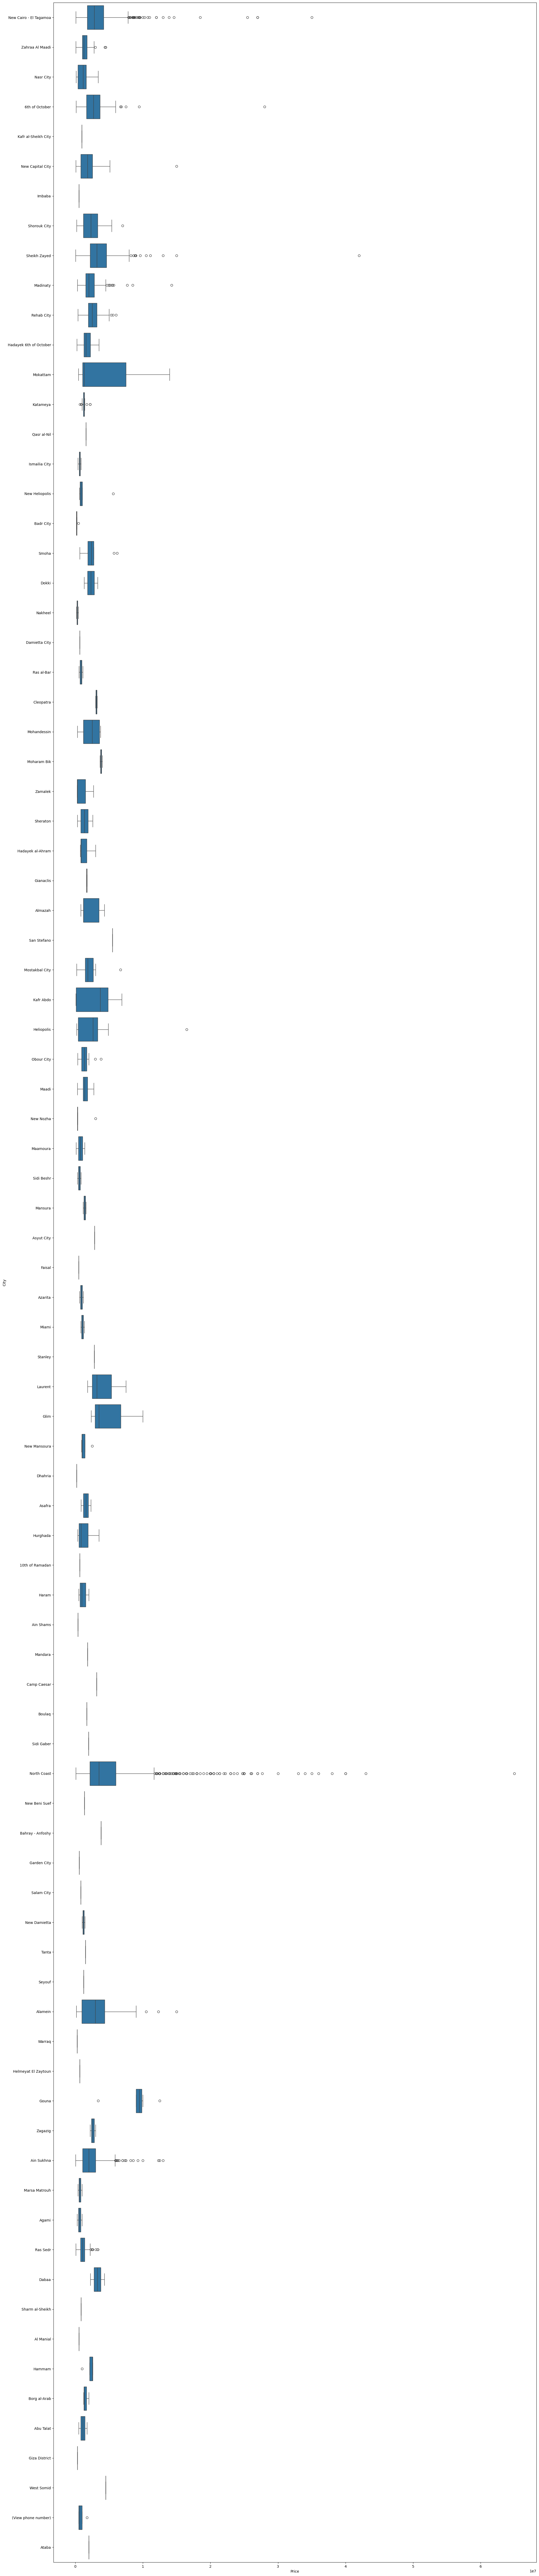

In [20]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df)

In [21]:
lcc = df['City'].value_counts().keys().tolist()

In [22]:
for x in lcc:
    Q1= df[(df['City']==x)]['Price'].quantile(0.25)
    Q3= df[(df['City']==x)]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.2 * IQR
    lower_bound = Q1 - 1.2 * IQR
    df=df.drop(df[(df['City']==x)&(df['Price']>=upper_bound)].index)
    df=df.drop(df[(df['City']==x)&(df['Price']<=lower_bound)].index)

<Axes: xlabel='Price', ylabel='City'>

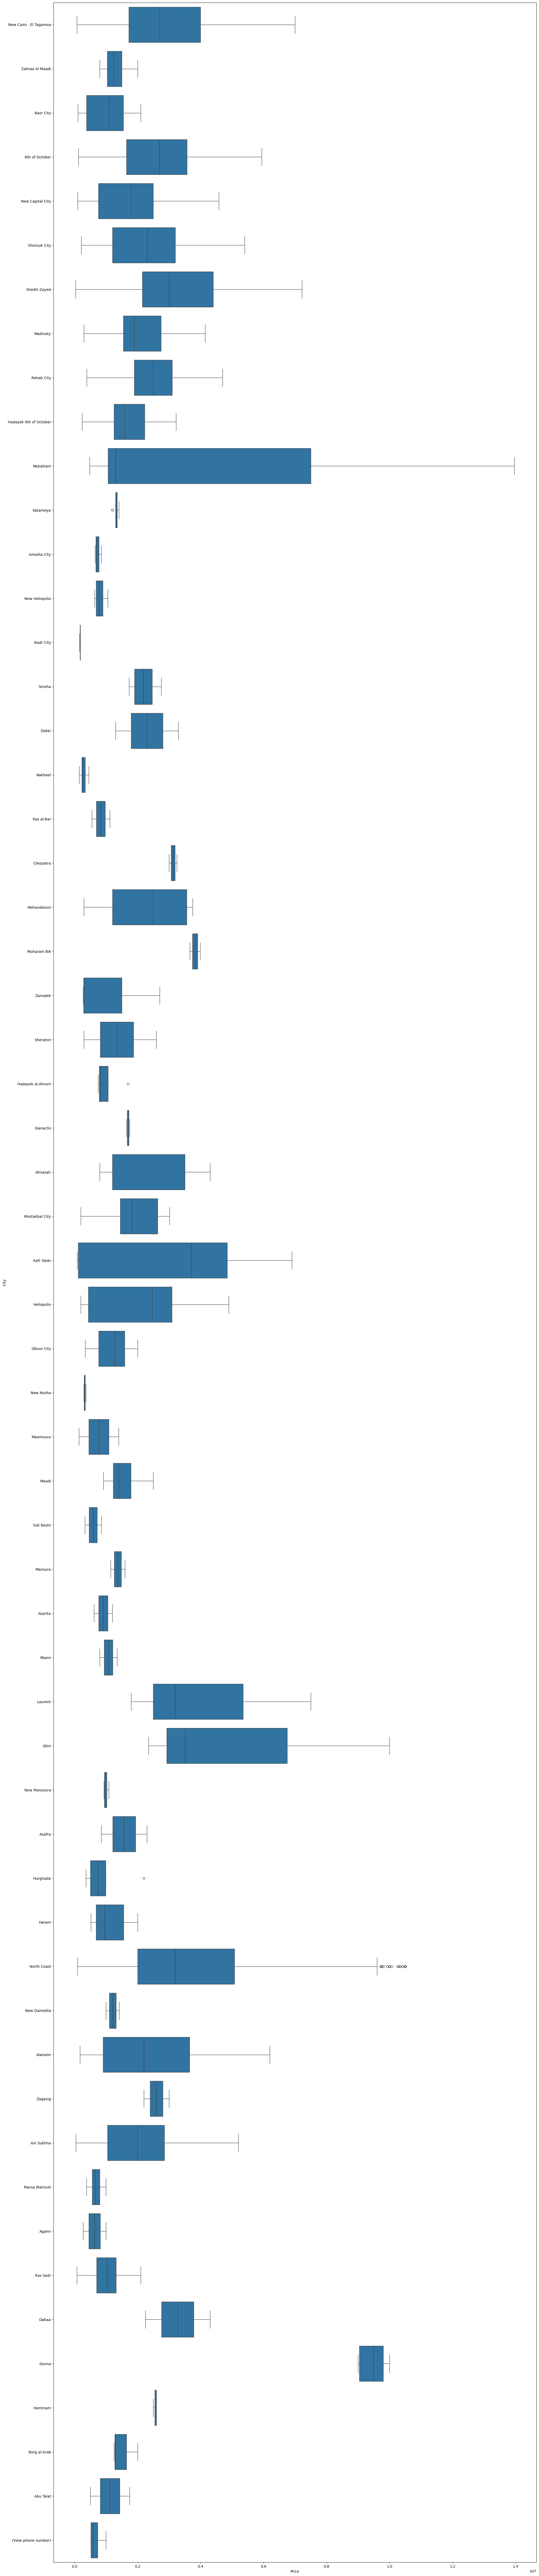

In [23]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df)

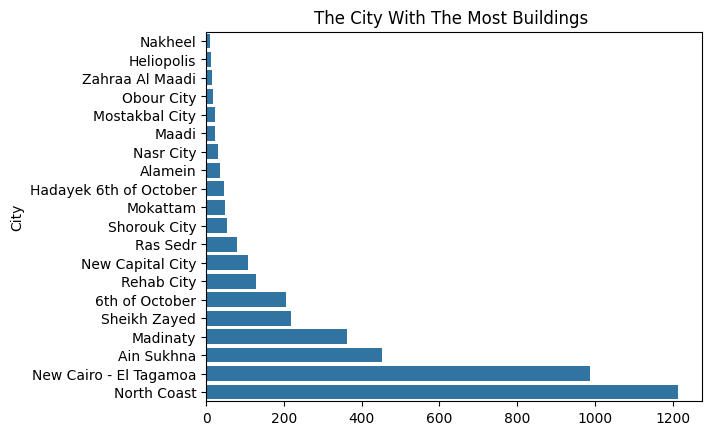

In [24]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

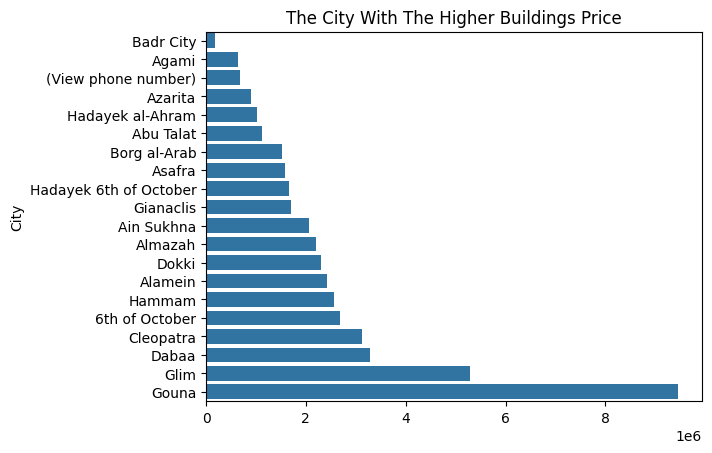

In [25]:
lpm = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

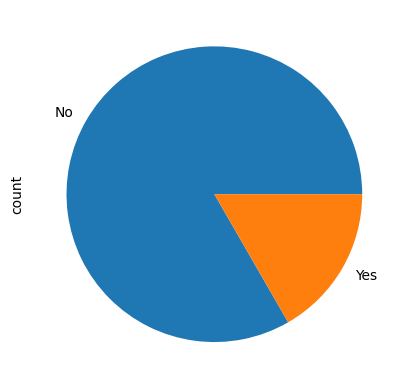

In [26]:
df['Furnished'].value_counts().plot(kind='pie');

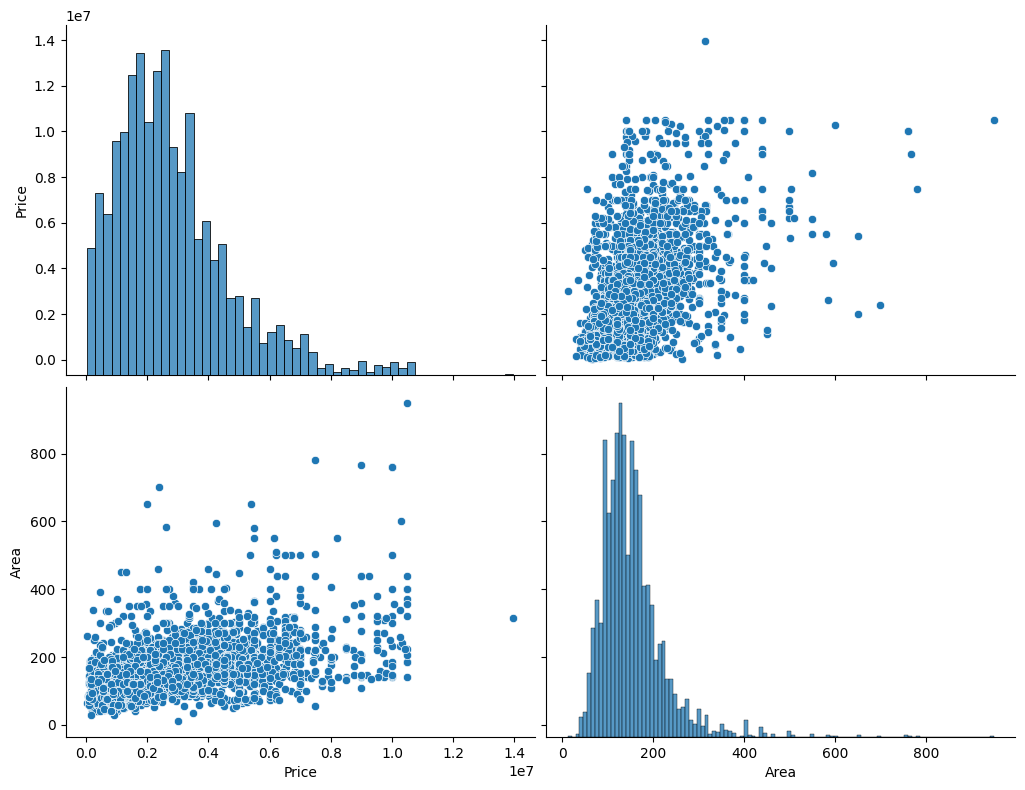

In [28]:
sns.pairplot(df, vars = ['Price', 'Area'], height=4, aspect=1.3)

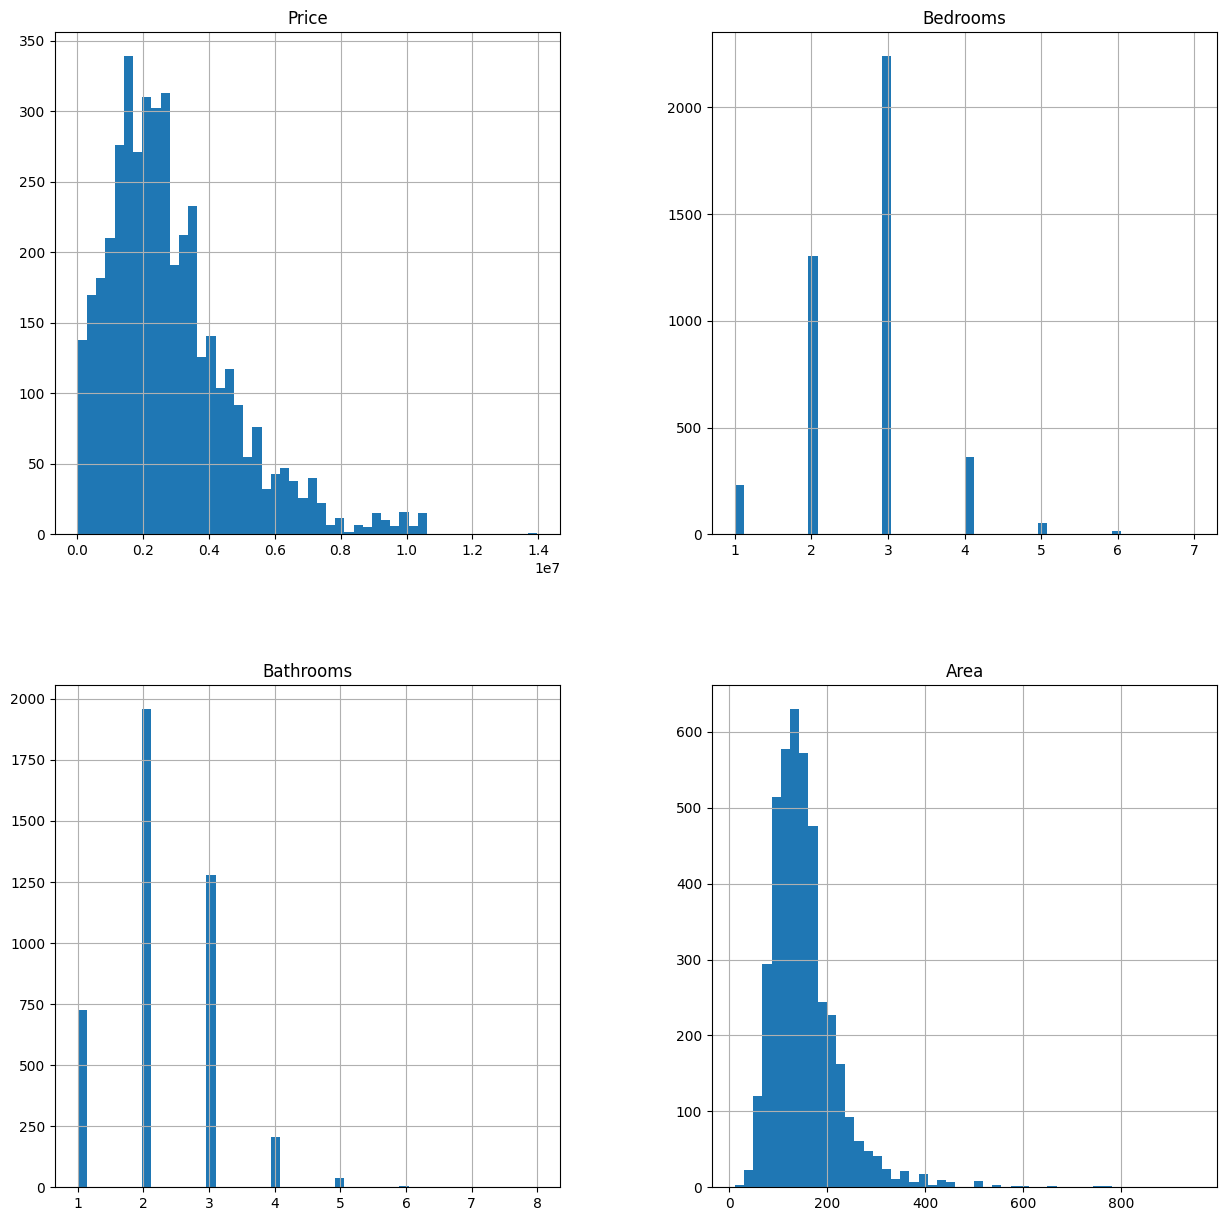

In [29]:
df.hist(bins=50, figsize=(15, 15));

**kmedoids**


In [30]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00


In [31]:
df['Level'] = df['Level'].astype(float).astype(int)
df['Level']

0       0
1       1
2       1
3       2
4       3
       ..
4522    0
4523    2
4525    0
4526    0
4527    1
Name: Level, Length: 4208, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4208 entries, 0 to 4527
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            4208 non-null   object
 1   Price           4208 non-null   int64 
 2   Bedrooms        4208 non-null   int64 
 3   Bathrooms       4208 non-null   int64 
 4   Area            4208 non-null   int64 
 5   Furnished       4208 non-null   object
 6   Level           4208 non-null   int64 
 7   Compound        4208 non-null   object
 8   Payment_Option  4208 non-null   object
 9   Delivery_Date   4208 non-null   object
 10  Delivery_Term   4208 non-null   object
 11  City            4208 non-null   object
dtypes: int64(5), object(7)
memory usage: 427.4+ KB


Cluster medoids:
    Area      Price  Bedrooms  Bathrooms  Level
0  174.0  2500000.0       3.0        3.0    2.0
1   90.0  1300000.0       2.0        1.0    2.0
2  110.0  2310000.0       2.0        2.0    1.0
3  217.0  5150000.0       3.0        3.0    1.0
4  137.0  2150000.0       3.0        2.0    2.0
Cluster sizes:
cluster
4    1104
0     848
2     810
3     777
1     669
Name: count, dtype: int64


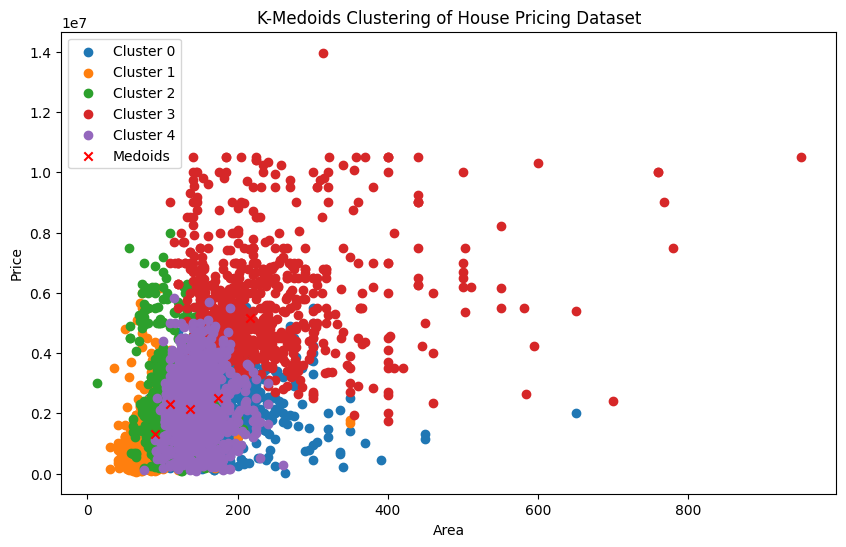

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the dataset
X = df[['Area', 'Price', 'Bedrooms', 'Bathrooms', 'Level']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = kmedoids.labels_

# Print the cluster centers (medoids)
medoids = scaler.inverse_transform(kmedoids.cluster_centers_)
print("Cluster medoids:")
print(pd.DataFrame(medoids, columns=X.columns))

# Print the cluster sizes
print("Cluster sizes:")
print(df['cluster'].value_counts())

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = X[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Area'], cluster_data['Price'], label=f'Cluster {cluster_label}')

# Plotting the medoids
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', label='Medoids')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('K-Medoids Clustering of House Pricing Dataset')
plt.legend()
plt.show()


Cluster medoids:
    Area      Price  Bedrooms  Bathrooms  Level
0  174.0  2500000.0       3.0        3.0    2.0
1   90.0  1300000.0       2.0        1.0    2.0
2  110.0  2310000.0       2.0        2.0    1.0
3  217.0  5150000.0       3.0        3.0    1.0
4  137.0  2150000.0       3.0        2.0    2.0
Cluster sizes:
cluster
4    1104
0     848
2     810
3     777
1     669
Name: count, dtype: int64


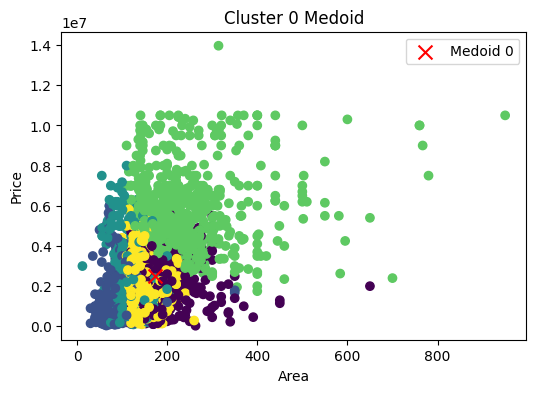

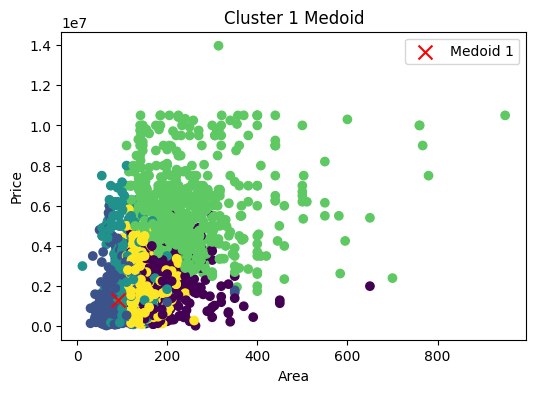

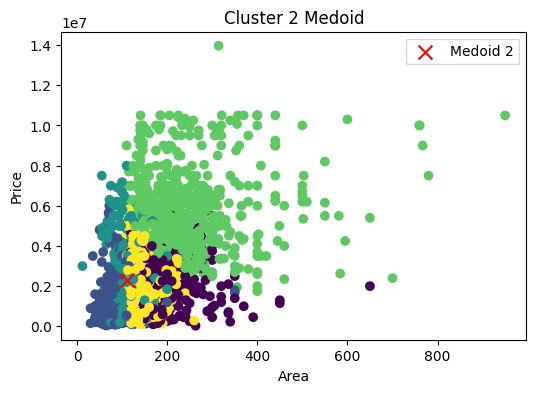

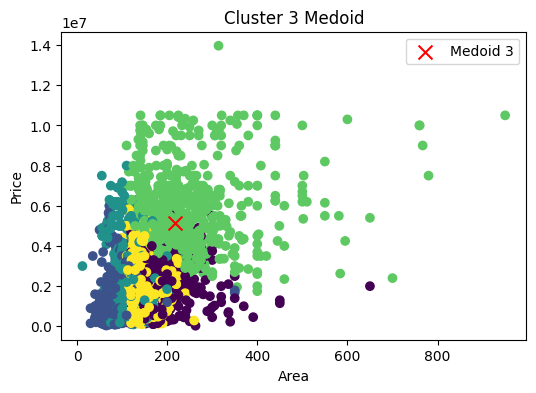

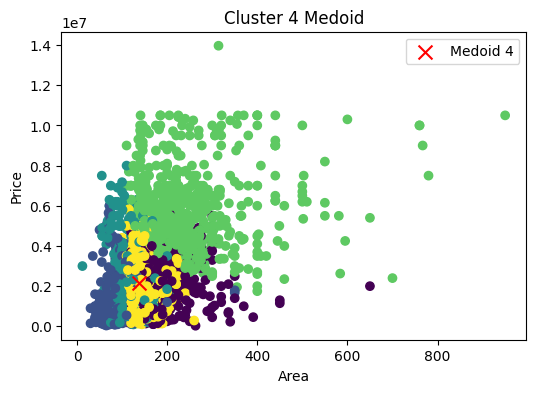

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'df' is your DataFrame containing the dataset
X = df[['Area', 'Price', 'Bedrooms', 'Bathrooms', 'Level']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = kmedoids.labels_

# Print the cluster centers (medoids)
medoids = scaler.inverse_transform(kmedoids.cluster_centers_)
print("Cluster medoids:")
print(pd.DataFrame(medoids, columns=X.columns))

# Print the cluster sizes
print("Cluster sizes:")
print(df['cluster'].value_counts())

# Plotting each medoid alone
for i, medoid in enumerate(medoids):
    plt.figure(figsize=(6, 4))
    plt.scatter(X['Area'], X['Price'], c=df['cluster'], cmap='viridis')
    plt.scatter(medoid[0], medoid[1], c='red', marker='x', label=f'Medoid {i}', s=100)
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title(f'Cluster {i} Medoid')
    plt.legend()
    plt.show()


**Hierarchical clustering**

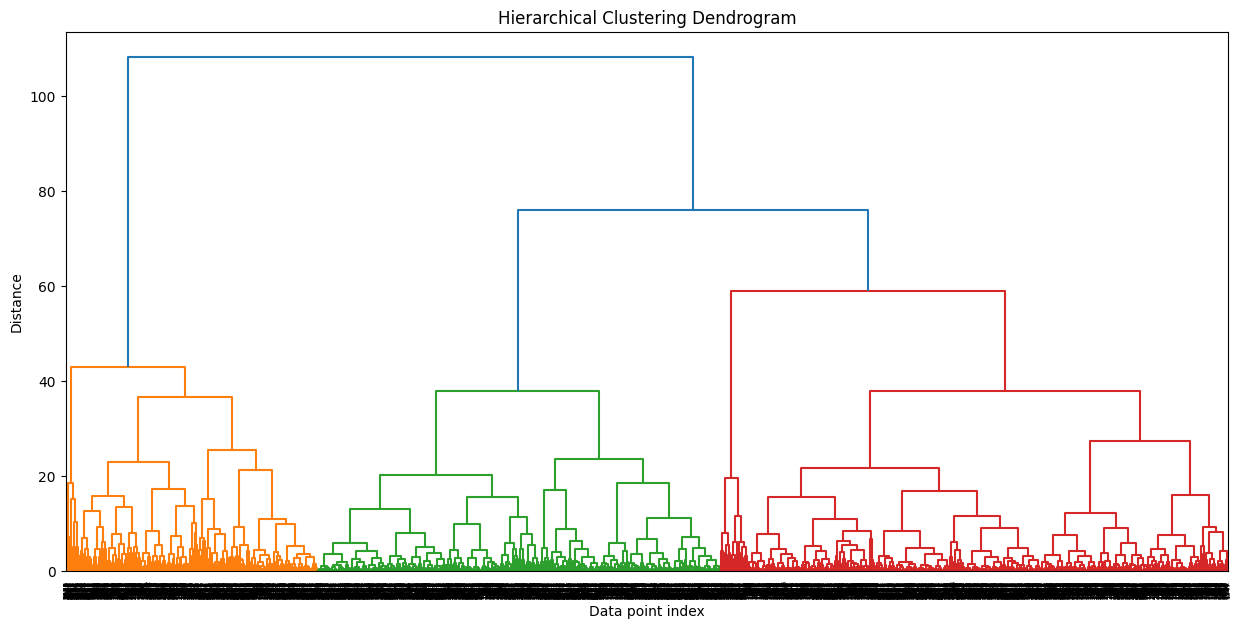

In [39]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'df' is your DataFrame containing the dataset
X = df[['Area', 'Price', 'Bedrooms', 'Bathrooms', 'Level']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()


In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate K-Medoids clustering
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids.labels_)
kmedoids_db = davies_bouldin_score(X_scaled, kmedoids.labels_)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Davies–Bouldin Index:", kmedoids_db)

# Perform hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(X_scaled)

# Evaluate hierarchical clustering
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical.labels_)
hierarchical_db = davies_bouldin_score(X_scaled, hierarchical.labels_)
print("\nHierarchical Silhouette Score:", hierarchical_silhouette)
print("Hierarchical Davies–Bouldin Index:", hierarchical_db)


K-Medoids Silhouette Score: 0.1986016314864286
K-Medoids Davies–Bouldin Index: 1.6253127416805586

Hierarchical Silhouette Score: 0.2528346625767565
Hierarchical Davies–Bouldin Index: 1.2069912099519384
